In [16]:
# Importa as coisas necessarias
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
#from graphviz import Graph

In [6]:
# Lê o arquivo com os dados
file = pd.read_csv("turmas.csv")
file.head()

,Ano-Período,Componente,Tipo,Situação,Horário,Vagas
0,2018-2,DBQ0050 - BIOINFORMÁTICA ESTRUTURAL,Turma Regular,Atendida,35T12 (30/07/2018 - 22/12/2018),20
1,2018-2,DBQ0050 - BIOINFORMÁTICA ESTRUTURAL,Turma Regular,Removida,35T34 (30/07/2018 - 22/12/2018),10
2,2018-2,DIM0109.0 - CIRCUITOS LÓGICOS,Turma Regular,Removida,24T34,10
3,2018-2,DIM0109.1 - LABORATÓRIO DE CIRCUITOS LÓGICOS,Turma Regular,Removida,6T34,10
4,2018-2,DIM0114 - BANCO DE DADOS,Turma Regular,Atendida,24M34 (30/07/2018 - 22/12/2018),10


In [147]:
# Seleciona as turmas atendidas
atendidas = file[file["Situação"] == "Atendida"].head(20)
atendidas = atendidas.reset_index()
atendidas = atendidas.drop(columns=['index'])

In [148]:
# Filtra as disciplinas com conflito de horarios pela tarde
dias_semana = ['2','3','4','5','6']
h_semana = ['1','2','3','4','5','6']

horariosT = []
for j in range(len(dias_semana)):
    horariosT.append([])
    for k in range(len(h_semana)):
        horariosT[j].append([])
        
for i in range(len(atendidas["Horário"])):
    if 'T' in atendidas["Horário"][i]:
        h = atendidas["Horário"][i].split('T')
        dias = h[0]
        tarde = h[1]
        for j in range(len(dias_semana)):
            for k in range(len(h_semana)):
                if dias_semana[j] in dias and h_semana[k] in tarde:
                    horariosT[j][k].append(atendidas["Componente"][i])

In [149]:
# Filtra as disciplinas com conflito de horarios pela manhã
horariosM = []
for j in range(len(dias_semana)):
    horariosM.append([])
    for k in range(len(h_semana)):
        horariosM[j].append([])
        
for i in range(len(atendidas["Horário"])):
    if 'M' in atendidas["Horário"][i]:
        h = atendidas["Horário"][i].split('M')
        dias = h[0]
        tarde = h[1]
        for j in range(len(dias_semana)):
            for k in range(len(h_semana)):
                if dias_semana[j] in dias and h_semana[k] in tarde:
                    horariosM[j][k].append(atendidas["Componente"][i])

In [150]:
#Cria o grafo com os conflitos encontrados
g = nx.Graph()
for j in range(len(dias_semana)):
    for k in range(len(h_semana)):
        for disc1 in horariosM[j][k]:
            for disc2 in horariosM[j][k]:
                if disc1 != disc2 :
                    g.add_edge(disc1, disc2)
                    
for j in range(len(dias_semana)):
    for k in range(len(h_semana)):
        for disc1 in horariosT[j][k]:
            for disc2 in horariosT[j][k]:
                if disc1 != disc2 :
                    g.add_edge(disc1, disc2)

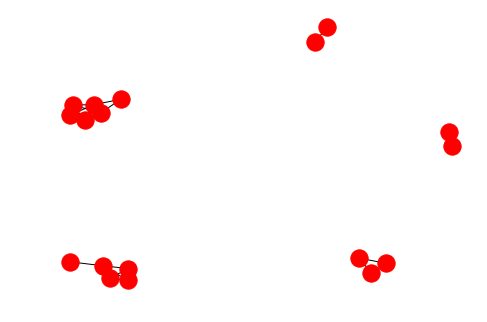

In [153]:
#Mostra o codigo gerado
# print(g.source)
nx.draw(g)
plt.draw()

In [151]:
pp = {}
p = [(0,0),(0,10),(10,5),(8,7),(7,8),(8,9)]
for i, n in enumerate(g.nodes):
    pp[n] = p[i]
    #print(n, p[i])

pos = nx.spring_layout(g,k=10,scale=0.05)
#options = {
    #'font_weight':'bold',
#    'with_labels':True
#}
nx.draw(g, pos)
plt.draw()

IndexError: list index out of range

DIM0117 - ESTRUTURAS DE DADOS BÁSICAS II (6, 1)
DIM0119 - ESTRUTURA DE DADOS BÁSICAS I (10, 10)
DIM0120 - LINGUAGEM DE PROGRAMAÇÃO I (6, 3)
DBQ0050 - BIOINFORMÁTICA ESTRUTURAL (8, 7)
DIM0124 - PROGRAMAÇÃO CONCORRENTE (7, 8)
DIM0346 - GERENCIAMENTO E SEGURANCA EM REDES DE COMPUTADORES (8, 9)
